<a href="https://colab.research.google.com/github/Luiskar1/Luiskar1/blob/main/Regresi%C3%B3nLogistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#La Regresión Logística Simple#

La regresión logística es un método estadístico que trata de modelar la probabilidad de una variable cualitativa binaria (dos posibles valores) en función de una o más variables independientes. La principal aplicación de la regresión logística es la creación de modelos de clasificación binaria.

Se llama regresión logística simple cuando solo hay una variable independiente y regresión logística múltiple cuando hay más de una. Dependiendo del contexto, a la variable modelada se le conoce como variable dependiente o variable respuesta, y a las variables independientes como regresores, predictores o features.

**¿Qué ocurre cuando la variable respuesta es binaria, solo dos posibles valores?**

Si una variable cualitativa con dos niveles (binaría) se codifica como 0 y 1, matemáticamente es posible ajustar un modelo de regresión lineal por mínimos cuadrados. Sin embargo, esta aproximación tiene dos problemas:

1. Al generar una recta (hiperplano si hay múltiples variables), se pueden obtener valores predichos distintos de 0 y 1, lo que entra en contradicción con la definición de la variable respuesta binaria.

2. Si se quiere interpretar las predicciones del modelo como probabilidades de pertenencia a cada clase, no se cumpliría la condición de que toda probabilidad ha de estar dentro del intervalo [0,1], ya que podrían obtenerse valores fuera de este.

3. Para evitar estos problemas, la regresión logística (David Cox 1958) transforma el valor devuelto por la regresión lineal con una función cuyo resultado siempre está comprendido entre 0 y 1. Existen varias funciones que cumplen esta descripción, una de las más utilizadas es la función logística (también conocida como función sigmoide)

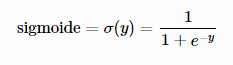


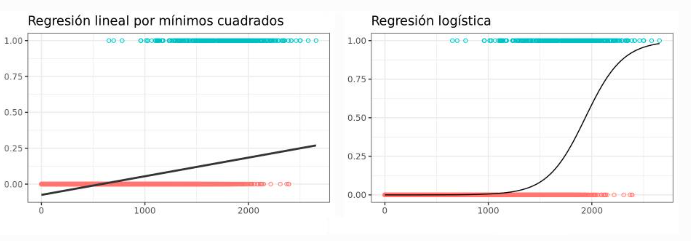

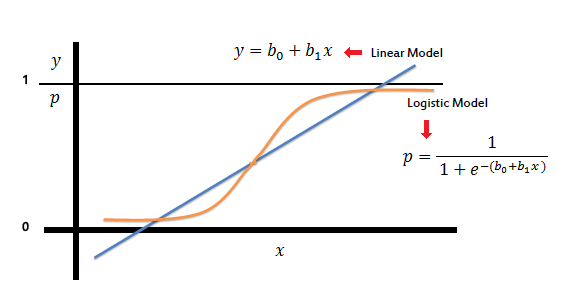

**La Probabiliad y la Aplicación del Logaritmo de ODDS**

Debido a que es necesario aplicar una transformación, se recurre entonces a una función logaritmica, para ello se utiliza el logartimo de Odds

**Interpretación del modelo**

Los principales elementos que hay que interpretar en un modelo de regresión logística son los coeficientes de los predictores:

β0  es la ordenada en el origen o intercept. Se corresponde con el valor esperado del logaritmo de odds cuando todos los predictores son cero.

βp  los coeficientes de regresión parcial de cada predictor indican el cambio promedio del logaritmo de odds al incrementar en una unidad la variable predictora xp, manteniéndose constantes el resto de variables.

###Principales métricas para modelos de clasificación###

1. Matriz de confusión o error
2. Accuracy (Exactitud)
3. Precisión
3. Recall o sensibilidad o TPR (Tasa positiva real)
4. F1-Score
5. Área bajo la curva de funcionamiento del receptor (ROC) (AUC)




###La Matriz de confusión###

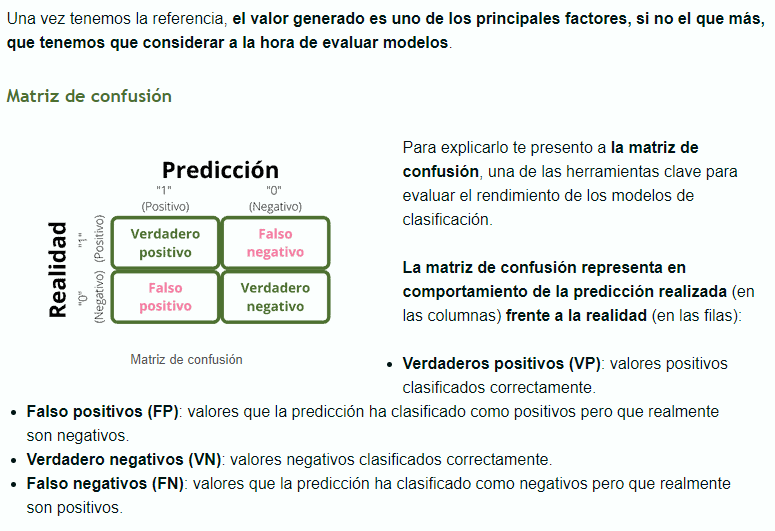

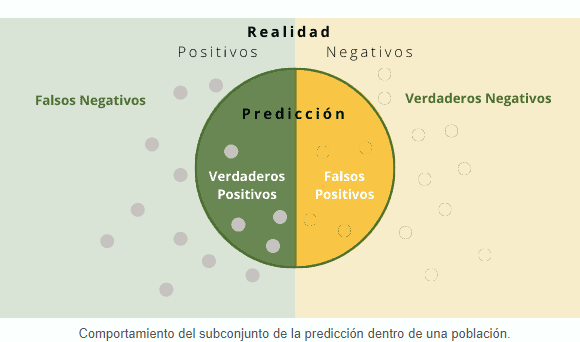

Normalmente el modelo de predicción se desarrolla o entrena sobre un subconjunto de muestra sobre la población total.

El número de aciertos y fallos del modelo sobre dicho subconjunto se representa en la matriz de confusión de la misma forma que vimos con el cálculo de valor y a partir de esta calculamos las métricas que nos interesan.


**Exactitud (Accuracy en inglés)**
El primer indicador es la Exactitud o Accuracy en inglés. 

Siempre se usa la palabra inglesa porque es como se va encontrar escrita en casi todos los sitios, incluso en los de castellano.

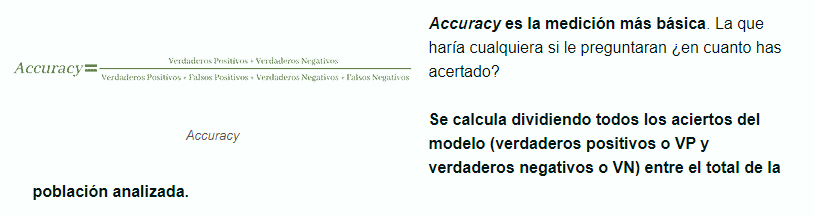

El Accuracy no sirve cuando los datos están muy desbalanceados (Datos desbalanceados muchos positivos y pocos negativos)
Por eso necesitamos otras métricas como la Precisión y la Sensibilidad que están enfocadas en los «positivos». 




**Precisión (Precision en inglés)**
La siguiente métrica es Precisión.

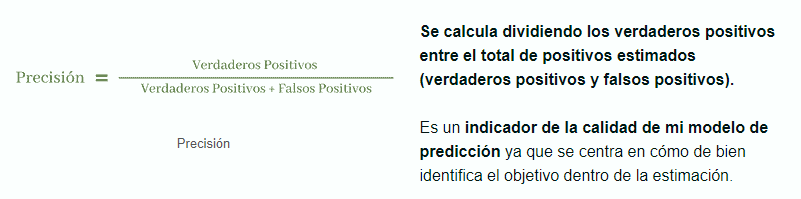

**La Sensibilidad (Recall)** Es un indicador muy interesante cuando el coste de no identificar a un positivo (falso negativo) es muy alto. 

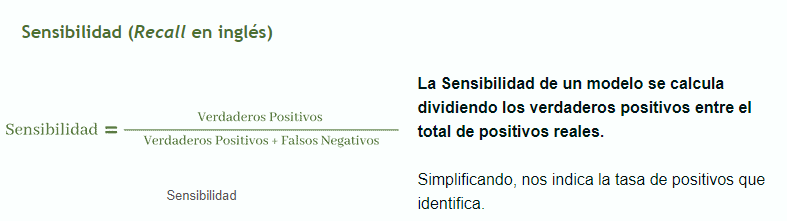

**F1 - Score**: Puede haber situaciones en las que nos interese equilibrar el resultado entre Precisión y Sensibilidad. 

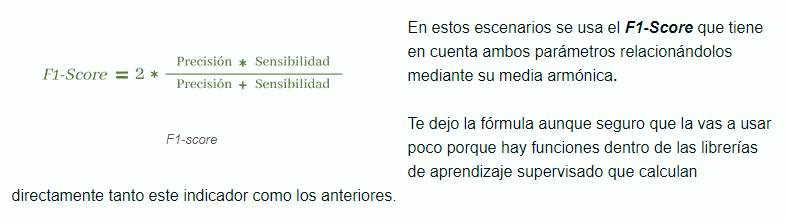

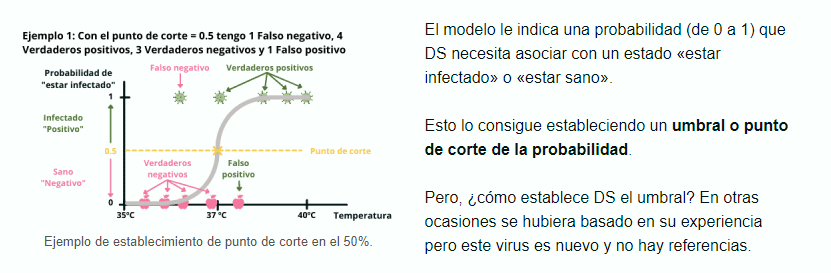

**Curvas ROC Receiver Operating Characteristic en inglés (Característica Operativa del Receptor en castellano)**


La curva ROC se obtiene uniendo los puntos que representan la tasa de verdaderos positivos (eje de las «y») y la falsos positivos (eje de las «x») para cada umbral y permite establecer el umbral óptimo.

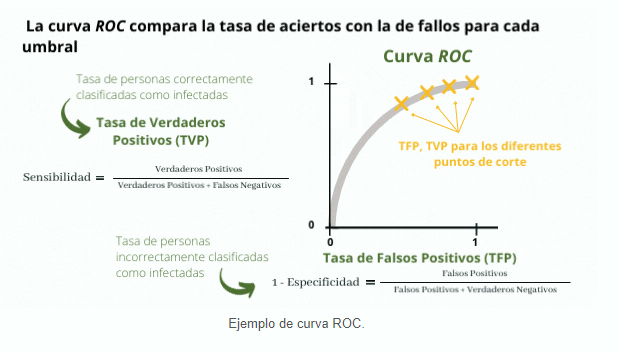

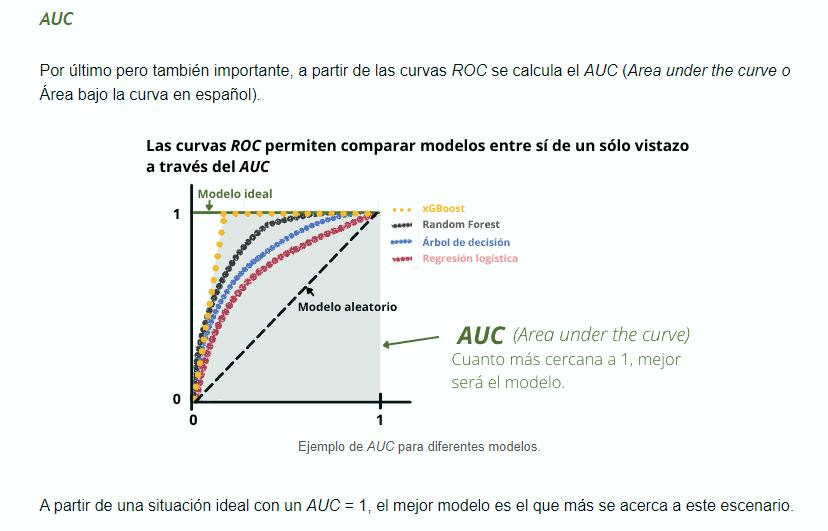

Bibliografía:Datos obtenidos de:https://impulsatek.com/14-metricas-esenciales-para-construir-modelos-definitivos/






In [1]:
## APLICACIÓN DEL MODELO LOGIT
# Importar librerias
import pandas as pd
import numpy as np

# Gráficos
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import ttest_ind

# Configuración matplotlib
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Cargar la Data
df=pd.read_excel("/content/drive/MyDrive/Analíticas de Aprendizaje/DatasET_Diplomado.xlsx")

In [3]:
# #Observar la tabla
df.head(10)


,Hor_Est,Nota_Eval,Tip_Inst,Horario
0,1.0,0.5,Pub,N
1,1.0,1.0,Pub,N
2,1.5,0.8,Pub,N
3,1.5,0.7,Pub,N
4,1.5,0.3,Pub,N
5,1.5,0.5,Pub,N
6,1.5,0.0,Pri,N
7,1.5,1.0,Mix,N
8,1.5,0.5,Mix,N
9,1.5,0.4,Pub,N


In [4]:
# Creación de un diccionario
#Cambiar los valores categóricos de las variables a numéricos
#=========================================
df.Horario=df.Horario.replace({'N':0, 'D':1})
df.head()

,Hor_Est,Nota_Eval,Tip_Inst,Horario
0,1.0,0.5,Pub,0
1,1.0,1.0,Pub,0
2,1.5,0.8,Pub,0
3,1.5,0.7,Pub,0
4,1.5,0.3,Pub,0


In [5]:
df.Tip_Inst=df.Tip_Inst.replace({'Pub':0,'Pri':1,'Mix':2})
df.head(11)

,Hor_Est,Nota_Eval,Tip_Inst,Horario
0,1.0,0.5,0.0,0
1,1.0,1.0,0.0,0
2,1.5,0.8,0.0,0
3,1.5,0.7,0.0,0
4,1.5,0.3,0.0,0
5,1.5,0.5,0.0,0
6,1.5,0.0,1.0,0
7,1.5,1.0,2.0,0
8,1.5,0.5,2.0,0
9,1.5,0.4,0.0,0


In [6]:
#Dimension del Dataset
print(df.shape)

(307, 4)


In [7]:
# Conocer el tipo de variable
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Hor_Est    307 non-null    float64
 1   Nota_Eval  304 non-null    float64
 2   Tip_Inst   306 non-null    float64
 3   Horario    307 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 9.7 KB
None


In [8]:
# Identificamos el número de missing values (datos nulos o perdidos de cada variable) en cada columna
df.isnull().sum()

Hor_Est      0
Nota_Eval    3
Tip_Inst     1
Horario      0
dtype: int64

In [9]:
# Imputamos la variable Nota_Eval con la media
df['Nota_Eval'].fillna(df['Nota_Eval'].mean(), inplace=True)
print("valores perdidos en Nota_Eval: " + 
      str(df['Nota_Eval'].isnull().sum()))

# Imputamos la variable Tip_Inst con la moda
df['Tip_Inst'].fillna(df['Tip_Inst'].mode()[0], inplace=True)
print("Valores perdidos en Tip_Inst: " + 
      str(df['Tip_Inst'].isnull().sum()))

valores perdidos en Nota_Eval: 0
Valores perdidos en Tip_Inst: 0


In [10]:
# Mostrar los datos imputados
df.isnull().sum()

Hor_Est      0
Nota_Eval    0
Tip_Inst     0
Horario      0
dtype: int64

In [11]:
#Determinar las variables numéricas
VariablesNumericas=df._get_numeric_data().columns.to_list()
print(VariablesNumericas)
print(len(VariablesNumericas))

['Hor_Est', 'Nota_Eval', 'Tip_Inst', 'Horario']
4


In [12]:
## Variables Categoricas
VariablesCategoricas=df.select_dtypes(include=["category"]).columns.to_list()
print(VariablesCategoricas)
print(len(VariablesCategoricas))

[]
0


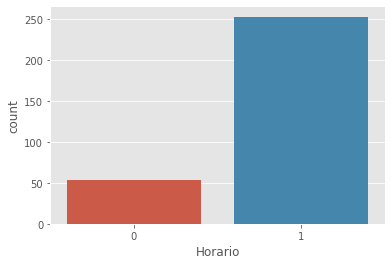

In [13]:
sns.countplot("Horario",data=df)

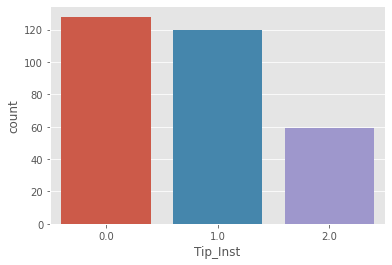

In [14]:
sns.countplot("Tip_Inst",data=df)

In [15]:
df.columns

Index(['Hor_Est', 'Nota_Eval', 'Tip_Inst', 'Horario'], dtype='object')

In [16]:
VariablesNumericas

['Hor_Est', 'Nota_Eval', 'Tip_Inst', 'Horario']

In [17]:
# Definición de la variable independiente y respuesta del Dataframe (La variable Horario es dicotómica N=0; D=1)
Y=df.Nota_Eval
X=df.Horario

In [18]:
# Número de obsercaciones Tipo de Institución
df.Horario.value_counts().sort_index()

0     54
1    253
Name: Horario, dtype: int64

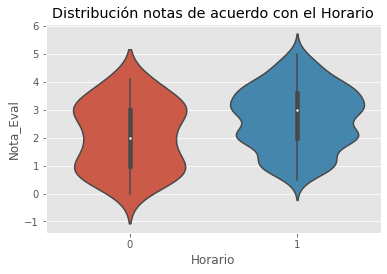

In [19]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

sns.violinplot(
        x     = 'Horario',
        y     = 'Nota_Eval',
        data  = df,
        #color = "white",
        ax    = ax
    )

ax.set_title('Distribución notas de acuerdo con el Horario');

**Ajuste del modelo**

Se ajusta un modelo empleando como variable respuesta Horario y como predictor nota Evaluativa. Como en todo estudio predictivo, no solo es importante ajustar el modelo, sino también cuantificar su capacidad para predecir nuevas observaciones. Para poder hacer esta evaluación, se dividen los datos en dos grupos, uno de entrenamiento y otro de test.

***Scikit-learn***

In [20]:
# Ajuste del modelo: X de entrenamiento, x de testeo, y de entrenamiento, y de testeo
X = df[['Nota_Eval']]
y = df['Horario']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [21]:
# Creación del modelo
# ==============================================================================
# Para no incluir ningún tipo de regularización en el modelo se indica
# penalty='none'
modelo = LogisticRegression(penalty='none')
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

LogisticRegression(penalty='none')

In [22]:
# Información del modelo
# ==============================================================================
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Accuracy de entrenamiento:", modelo.score(X, y))

Intercept: [0.19684306]
Coeficiente: [('Nota_Eval', 0.46232630661404295)]
Accuracy de entrenamiento: 0.8241042345276873


In [23]:
# Predicciones probabilísticas
# ==============================================================================
# Con .predict_proba() se obtiene, para cada observación, la probabilidad predicha
# de pertenecer a cada una de las dos clases.
predicciones = modelo.predict_proba(X = X_test)
predicciones = pd.DataFrame(predicciones, columns = modelo.classes_)
predicciones.head(3)

,0,1
0,0.170255,0.829745
1,0.245734,0.754266
2,0.220941,0.779059


***Statsmodels***

La implementación de regresión logística de Statsmodels, es más completa que la de Scikitlearn ya que, además de ajustar el modelo, permite calcular los test estadísticos y análisis necesarios para verificar que se cumplen las condiciones sobre las que se basa este tipo de modelos. Statsmodels tiene dos formas de entrenar el modelo:

Indicando la fórmula del modelo y pasando los datos de entrenamiento como un dataframe que incluye la variable respuesta y los predictores. Esta forma es similar a la utilizada en R.

Pasar dos matrices, una con los predictores y otra con la variable respuesta. Esta es igual a la empleada por Scikitlearn con la diferencia de que a la matriz de predictores hay que añadirle una primera columna de 1s.

In [24]:
# División de los datos en train y test
# ==============================================================================
X = df[['Nota_Eval']]
y = df['Horario']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [25]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.Logit(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

Optimization terminated successfully.
         Current function value: 0.492707
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  214
Model:                          Logit   Df Residuals:                      212
Method:                           MLE   Df Model:                            1
Date:                Thu, 22 Sep 2022   Pseudo R-squ.:                 0.04204
Time:                        00:10:56   Log-Likelihood:                -105.44
converged:                       True   LL-Null:                       -110.07
Covariance Type:            nonrobust   LLR p-value:                  0.002350
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1968      0.395      0.498      0.618      -0.578       0.971
x1             0.4623      0.

**Interpretación**
El coeficiente estimado para la intersección (Intercept o const) es el valor esperado del logaritmo de odds de que un estudiante obtenga matrícula teniendo un 0 en matemáticas. Como cabría imaginar, los odds son muy bajos  e−8.9848=0.0001254 , lo que se corresponde con una probabilidad de obtener matrícula de  p=e0.00012541+e0.0001254=0.000125 .

Acorde al modelo, el logaritmo de odds de que un estudiante tenga matrícula está positivamente relacionado con la puntuación obtenida en matemáticas (coeficiente de regresión = 0.1439). Esto significa que, por cada unidad que se incrementa la variable matemáticas, se espera que el logaritmo de odds de la variable matrícula se incremente en promedio 0.1439 unidades. Aplicando la inversa del logaritmo natural ( e0.1439=1.155 ) se obtiene que, por cada unidad que se incrementa la variable matemáticas, los odds de obtener matrícula se incremente en promedio 1.169 unidades. No hay que confundir esto último con que la probabilidad de matrícula se incremente un 1.169 %.

A diferencia de la regresión lineal en la que  β1  se corresponde con el cambio promedio en la variable dependiente  y  debido al incremento en una unidad del predictor  x1 , en regresión logística,  β1  indica el cambio en el logaritmo de odds debido al incremento en una unidad de  x1 , o lo que es lo mismo, multiplica los odds por  eβ1 . Dado que la relación entre  p(y=1)  y  x  no es lineal, los coeficientes de regresión  βp  no se corresponden con el cambio en la probabilidad de  y  asociada con el incremento en una unidad de  x . Cuánto se incremente la probabilidad de  y  por unidad de  x  depende del valor de  x , es decir, de la posición en la curva logística en la que se encuentre.

In [26]:
# Predicción de probabilidades
# ==============================================================================
predicciones = modelo.predict(exog = X_train)
predicciones[:2]

array([0.67953467, 0.90300602])

In [27]:
# Clasificación predicha
# ==============================================================================
clasificacion = np.where(predicciones<0.5, 0, 1)
clasificacion

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [28]:
# Predicciones en todo el rango de X
# ==============================================================================
# Se crea un vector con nuevos valores interpolados en el rango de observaciones.
grid_X = np.linspace(
            start = min(df.Nota_Eval),
            stop  = max(df.Nota_Eval),
            num   = 200
         ).reshape(-1,1)

grid_X = sm.add_constant(grid_X, prepend=True)
predicciones = modelo.predict(exog = grid_X)

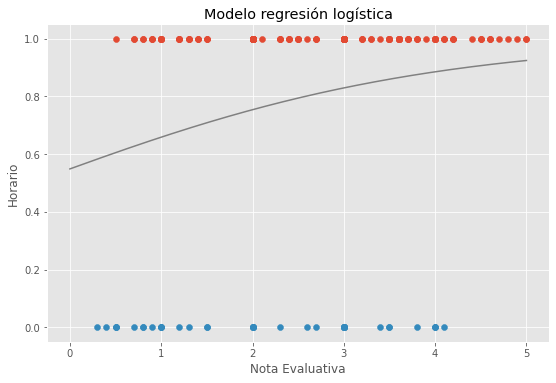

In [29]:
# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 5.84))

ax.scatter(
    X_train[(y_train == 1).flatten(), 1],
    y_train[(y_train == 1).flatten()].flatten()
)
ax.scatter(
    X_train[(y_train == 0).flatten(), 1],
    y_train[(y_train == 0).flatten()].flatten()
)
ax.plot(grid_X[:, 1], predicciones, color = "gray")
ax.set_title("Modelo regresión logística")
ax.set_ylabel("Horario")
ax.set_xlabel("Nota Evaluativa");

In [30]:
# Accuracy de test del modelo 
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
clasificacion = np.where(predicciones<0.5, 0, 1)
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = clasificacion,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 90.32258064516128%


In [31]:
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test, clasificacion)
cm

array([[ 0,  9],
       [ 0, 84]])

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

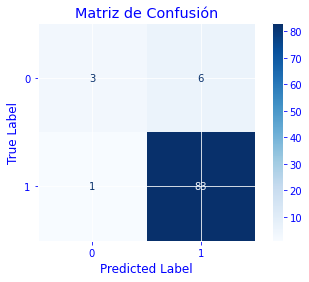

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
 
color = 'Blue'
matrix = plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Matriz de Confusión', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

In [34]:
#Reporte de las métricas
from sklearn.metrics import classification_report
 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.33      0.46         9
           1       0.93      0.99      0.96        84

    accuracy                           0.92        93
   macro avg       0.84      0.66      0.71        93
weighted avg       0.91      0.92      0.91        93



In [39]:
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification
model = LogisticRegression()
model.fit(X, y)
y_score = model.predict_proba(X)[:, 1]

fpr, tpr, thresholds = roc_curve(y, y_score)

fig = px.area(
    x=fpr, y=tpr,
    title=f'Curva ROC  (AUC={auc(fpr, tpr):.2f})',
    labels=dict(x='Falsos Positivos', y='Verdaderos Positivos'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()